<div style="
background-color:#f5f7fb;
padding:20px;
border-radius:12px;
border-left:6px solid #0b5394;
margin-bottom:20px;
margin-top:40px;
">

<h2 style="color:#0b5394; margin:0;">
Q2. Biological Health vs Behavioral Risk – Nghịch lý đô thị
</h2>

<p style="margin:8px 0 0 0; color:#444; font-style:italic; line-height:1.5;">
Phân tích nghịch lý giữa sức khỏe sinh học tốt và lối sống không lành mạnh
trong môi trường đô thị hiện đại.
</p>

</div>


In [5]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cài đặt style cho plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Đã import thư viện thành công!")

✓ Đã import thư viện thành công!


In [6]:
# Load dữ liệu đã được làm sạch từ preprocessing
df = pd.read_csv('../data/healthcare_cleaned.csv')

print(f"✓ Đã load dữ liệu thành công!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nCác cột: {df.columns.tolist()}")
print(f"\nSố ca đột quỵ: {df['stroke'].sum()} ({df['stroke'].mean()*100:.2f}%)")

✓ Đã load dữ liệu thành công!
Shape: 5110 rows × 11 columns

Các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Số ca đột quỵ: 249 (4.87%)


## 1. The Question

**Trong khu vực đô thị, những người có chỉ số sức khỏe sinh học tốt
(BMI và glucose ở mức bình thường) nhưng duy trì lối sống không lành mạnh
(hút thuốc, công việc ít vận động)
có nguy cơ đột quỵ cao hơn những người có chỉ số sức khỏe kém
nhưng duy trì lối sống lành mạnh hay không?**

> Câu hỏi tập trung vào **nghịch lý giữa "biological health" và "behavioral risk"**
> trong bối cảnh đô thị – nơi lối sống hiện đại có thể làm thay đổi mô hình nguy cơ truyền thống.


## 2. Motivation & Benefits

### 2.1. Motivation

Trong thực hành y tế và truyền thông sức khỏe cộng đồng,
việc đánh giá nguy cơ đột quỵ thường dựa chủ yếu vào các chỉ số sinh học như:

* BMI
* Mức đường huyết
* Bệnh nền

Tuy nhiên, tại các khu vực đô thị:

* Lối sống ít vận động
* Hút thuốc
* Công việc văn phòng kéo dài

có thể tạo ra **rủi ro tích lũy không thể hiện ngay trên các chỉ số sinh học**.

Câu hỏi này nhằm kiểm tra liệu:

> *"Sức khỏe sinh học tốt có thực sự đủ để bảo vệ con người khỏi đột quỵ trong môi trường đô thị hiện đại hay không?"*

---

### 2.2. Benefits & Practical Value

Việc trả lời câu hỏi này có thể:

* Cung cấp **bằng chứng thực nghiệm** cho vai trò của lối sống trong nguy cơ đột quỵ
* Hỗ trợ **thiết kế lại tiêu chí sàng lọc nguy cơ**, không chỉ dựa trên BMI & glucose
* Giúp định hướng:
  * Chương trình phòng ngừa đột quỵ tại đô thị
  * Wellness programs trong doanh nghiệp
  * Tư vấn sức khỏe cá nhân hóa




## 3. Preprocessing

### 3.1 Written Explanation

Quy trình tiền xử lý dữ liệu được thiết kế nhằm đảm bảo câu hỏi nghiên cứu
được trả lời một cách rõ ràng và không bị nhiễu bởi các yếu tố không liên quan.

Các bước chính gồm:

1. **Giới hạn không gian phân tích**
   * Chỉ giữ lại các quan sát thuộc khu vực đô thị
   * Nhằm loại bỏ khác biệt cấu trúc giữa đô thị và nông thôn

2. **Phân loại tình trạng sức khỏe sinh học**
   * Dựa trên BMI và mức glucose
   * Chia thành hai nhóm: *Sức khỏe tốt* và *Sức khỏe kém*

3. **Phân loại lối sống**
   * Dựa trên hành vi hút thuốc
   * Loại hình công việc được sử dụng như proxy cho mức độ ít vận động
   * Chia thành: *Lối sống lành mạnh* và *Lối sống không lành mạnh*

4. **Xây dựng nhóm so sánh chính**
   * Good health + Bad lifestyle
   * Poor health + Good lifestyle

5. **Loại bỏ các nhóm trung gian**
   * Nhằm tạo so sánh rõ ràng giữa hai cấu hình nguy cơ đối lập


In [7]:
# 3.2. Code Implementation

# Step 1: Filter urban residents WHO ALREADY HAD STROKE (giống như Q1)
# Quan trọng: Chỉ phân tích TRONG NHÓM đã bị đột quỵ
urban_stroke_df = df[(df["Residence_type"] == "urban") & (df["stroke"] == 1)].copy()

print("=== PHẠM VI PHÂN TÍCH Q2 ===")
print(f"Tổng số ca đột quỵ tại đô thị: {len(urban_stroke_df)}")
print(f"(Tương tự Q1, ta chỉ phân tích TRONG NHÓM ĐÃ BỊ ĐỘT QUỴ)")
print(f"\nĐể so sánh:")
print(f"  - Tổng dân số đô thị: {len(df[df['Residence_type'] == 'urban'])}")
print(f"  - Tỷ lệ đột quỵ tại đô thị: {df[df['Residence_type'] == 'urban']['stroke'].mean()*100:.2f}%")


=== PHẠM VI PHÂN TÍCH Q2 ===
Tổng số ca đột quỵ tại đô thị: 135
(Tương tự Q1, ta chỉ phân tích TRONG NHÓM ĐÃ BỊ ĐỘT QUỴ)

Để so sánh:
  - Tổng dân số đô thị: 2596
  - Tỷ lệ đột quỵ tại đô thị: 5.20%


In [8]:
# Step 2: Define biological health status
# Good health: normal BMI (18.5-25) AND normal glucose (<100)
# Poor health: high BMI (>=30) OR high glucose (>=140)

urban_stroke_df["good_bmi"] = ((urban_stroke_df["bmi"] >= 18.5) & (urban_stroke_df["bmi"] < 25)).astype(int)
urban_stroke_df["normal_glucose"] = (urban_stroke_df["avg_glucose_level"] < 100).astype(int)

# Biological health classification
urban_stroke_df["bio_health"] = "Mixed"
urban_stroke_df.loc[
    (urban_stroke_df["good_bmi"] == 1) & (urban_stroke_df["normal_glucose"] == 1),
    "bio_health"
] = "Good"
urban_stroke_df.loc[
    (urban_stroke_df["bmi"] >= 30) | (urban_stroke_df["avg_glucose_level"] >= 140),
    "bio_health"
] = "Poor"

print("\n=== PHÂN LOẠI SỨC KHỎE SINH HỌC (trong nhóm đã bị đột quỵ) ===")
print("\nBiological Health Distribution:")
print(urban_stroke_df["bio_health"].value_counts())
print("\nTỷ lệ (%):")
print(urban_stroke_df["bio_health"].value_counts(normalize=True) * 100)

# Thống kê chi tiết
print("\nChi tiết từng nhóm:")
for bio_health in ["Good", "Poor", "Mixed"]:
    subset = urban_stroke_df[urban_stroke_df["bio_health"] == bio_health]
    if len(subset) > 0:
        print(f"\n{bio_health}:")
        print(f"  Số ca: {len(subset)}")
        print(f"  BMI trung bình: {subset['bmi'].mean():.1f}")
        print(f"  Glucose trung bình: {subset['avg_glucose_level'].mean():.1f}")



=== PHÂN LOẠI SỨC KHỎE SINH HỌC (trong nhóm đã bị đột quỵ) ===

Biological Health Distribution:
bio_health
Poor     78
Mixed    46
Good     11
Name: count, dtype: int64

Tỷ lệ (%):
bio_health
Poor     57.777778
Mixed    34.074074
Good      8.148148
Name: proportion, dtype: float64

Chi tiết từng nhóm:

Good:
  Số ca: 11
  BMI trung bình: 22.9
  Glucose trung bình: 80.1

Poor:
  Số ca: 78
  BMI trung bình: 33.8
  Glucose trung bình: 168.4

Mixed:
  Số ca: 46
  BMI trung bình: 26.7
  Glucose trung bình: 90.2


In [9]:
# Step 3: Define lifestyle status
# Bad lifestyle: smoker OR sedentary work (Private/Self-employed as proxy)
# Good lifestyle: non-smoker AND active work type

# Tạo cột is_smoker nếu chưa có
if "is_smoker" not in urban_stroke_df.columns:
    urban_stroke_df["is_smoker"] = urban_stroke_df["smoking_status"].isin(
        ["smokes", "formerly smoked"]
    ).astype(int)

sedentary_jobs = ["private", "self-employed"]  # lowercase
urban_stroke_df["sedentary_work"] = urban_stroke_df["work_type"].isin(sedentary_jobs).astype(int)

# Lifestyle classification
urban_stroke_df["lifestyle"] = "Mixed"
urban_stroke_df.loc[
    (urban_stroke_df["is_smoker"] == 1) | (urban_stroke_df["sedentary_work"] == 1),
    "lifestyle"
] = "Bad"
urban_stroke_df.loc[
    (urban_stroke_df["is_smoker"] == 0) & (urban_stroke_df["sedentary_work"] == 0),
    "lifestyle"
] = "Good"

print("\n=== PHÂN LOẠI LỐI SỐNG (trong nhóm đã bị đột quỵ) ===")
print("\nLifestyle Distribution:")
print(urban_stroke_df["lifestyle"].value_counts())
print("\nTỷ lệ (%):")
print(urban_stroke_df["lifestyle"].value_counts(normalize=True) * 100)

# Thống kê chi tiết
print("\nChi tiết từng nhóm:")
for lifestyle in ["Good", "Bad", "Mixed"]:
    subset = urban_stroke_df[urban_stroke_df["lifestyle"] == lifestyle]
    if len(subset) > 0:
        print(f"\n{lifestyle}:")
        print(f"  Số ca: {len(subset)}")
        print(f"  Tỷ lệ hút thuốc: {subset['is_smoker'].mean()*100:.1f}%")
        print(f"  Tỷ lệ công việc ít vận động: {subset['sedentary_work'].mean()*100:.1f}%")



=== PHÂN LOẠI LỐI SỐNG (trong nhóm đã bị đột quỵ) ===

Lifestyle Distribution:
lifestyle
Bad     121
Good     14
Name: count, dtype: int64

Tỷ lệ (%):
lifestyle
Bad     89.62963
Good    10.37037
Name: proportion, dtype: float64

Chi tiết từng nhóm:

Good:
  Số ca: 14
  Tỷ lệ hút thuốc: 0.0%
  Tỷ lệ công việc ít vận động: 0.0%

Bad:
  Số ca: 121
  Tỷ lệ hút thuốc: 49.6%
  Tỷ lệ công việc ít vận động: 95.0%


In [10]:
# Step 4: Create comparison groups (TRONG NHÓM ĐÃ BỊ ĐỘT QUỴ)
# Group 1: Good biological health + Bad lifestyle
# Group 2: Poor biological health + Good lifestyle

urban_stroke_df["risk_profile"] = "Other"
urban_stroke_df.loc[
    (urban_stroke_df["bio_health"] == "Good") & (urban_stroke_df["lifestyle"] == "Bad"),
    "risk_profile"
] = "GoodHealth_BadLifestyle"
urban_stroke_df.loc[
    (urban_stroke_df["bio_health"] == "Poor") & (urban_stroke_df["lifestyle"] == "Good"),
    "risk_profile"
] = "PoorHealth_GoodLifestyle"

# Filter to only keep the two comparison groups
q2_analysis_df = urban_stroke_df[urban_stroke_df["risk_profile"] != "Other"].copy()

print("\n=== NHÓM SO SÁNH (Trong số bệnh nhân đột quỵ tại đô thị) ===")
print(f"\nTổng số ca phân tích: {len(q2_analysis_df)}")
print(f"Tỷ lệ: {len(q2_analysis_df)/len(urban_stroke_df)*100:.1f}% ca đột quỵ đô thị")

print("\n--- Phân bố nhóm ---")
print(q2_analysis_df["risk_profile"].value_counts())
print("\nTỷ lệ (%):")
print(q2_analysis_df["risk_profile"].value_counts(normalize=True) * 100)

print("\n--- Đặc điểm từng nhóm ---")
for profile in ["GoodHealth_BadLifestyle", "PoorHealth_GoodLifestyle"]:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        label = "Sức khỏe TỐT + Lối sống XẤU" if profile == "GoodHealth_BadLifestyle" else "Sức khỏe KÉM + Lối sống TỐT"
        print(f"\n{label}:")
        print(f"  Số ca: {len(subset)}")
        print(f"  BMI TB: {subset['bmi'].mean():.1f}")
        print(f"  Glucose TB: {subset['avg_glucose_level'].mean():.1f}")
        print(f"  Hút thuốc: {subset['is_smoker'].mean()*100:.1f}%")
        print(f"  Công việc ít vận động: {subset['sedentary_work'].mean()*100:.1f}%")



=== NHÓM SO SÁNH (Trong số bệnh nhân đột quỵ tại đô thị) ===

Tổng số ca phân tích: 16
Tỷ lệ: 11.9% ca đột quỵ đô thị

--- Phân bố nhóm ---
risk_profile
GoodHealth_BadLifestyle     11
PoorHealth_GoodLifestyle     5
Name: count, dtype: int64

Tỷ lệ (%):
risk_profile
GoodHealth_BadLifestyle     68.75
PoorHealth_GoodLifestyle    31.25
Name: proportion, dtype: float64

--- Đặc điểm từng nhóm ---

Sức khỏe TỐT + Lối sống XẤU:
  Số ca: 11
  BMI TB: 22.9
  Glucose TB: 80.1
  Hút thuốc: 36.4%
  Công việc ít vận động: 90.9%

Sức khỏe KÉM + Lối sống TỐT:
  Số ca: 5
  BMI TB: 36.0
  Glucose TB: 184.6
  Hút thuốc: 0.0%
  Công việc ít vận động: 0.0%


## 4. Analysis

### 4.1 Written Explanation

Phân tích được thực hiện theo hướng so sánh rủi ro giữa hai nhóm đối lập,
nhằm đánh giá vai trò tương đối của lối sống so với sức khỏe sinh học.

Các bước phân tích chính:

1. **So sánh tỷ lệ đột quỵ (stroke rate)**
   * Giữa hai nhóm phân tích trong cùng bối cảnh đô thị
   * Giúp trả lời câu hỏi ở mức độ mô tả

2. **Chuẩn hóa theo quy mô mẫu**
   * Đảm bảo sự khác biệt không xuất phát từ chênh lệch số lượng quan sát

3. **Đánh giá mức độ chênh lệch rủi ro**
   * Sử dụng các thước đo: Relative Risk, Odds Ratio
   * Giúp định lượng mức độ ảnh hưởng của lối sống

4. **Phân tích độ ổn định kết quả**
   * Kiểm tra kết quả dưới các cách phân loại ngưỡng BMI/glucose khác nhau
   * Nhằm giảm rủi ro kết luận phụ thuộc vào một ngưỡng cố định


In [11]:
# 4.2. Code Implementation - Descriptive Statistics

# Lưu ý: TẤT CẢ đều là ca đột quỵ (stroke = 1), nên không so sánh "stroke rate" nữa
# Thay vào đó, ta so sánh TỶ LỆ CHIẾM và ĐẶC ĐIỂM của từng nhóm

# Calculate group sizes
gh_bl = q2_analysis_df[q2_analysis_df["risk_profile"] == "GoodHealth_BadLifestyle"]
ph_gl = q2_analysis_df[q2_analysis_df["risk_profile"] == "PoorHealth_GoodLifestyle"]

# Create summary table
summary_table = pd.DataFrame({
    "Nhóm": ["Sức khỏe TỐT + Lối sống XẤU", "Sức khỏe KÉM + Lối sống TỐT"],
    "Số ca đột quỵ": [len(gh_bl), len(ph_gl)],
    "Tỷ lệ chiếm (%)": [
        len(gh_bl) / len(q2_analysis_df) * 100,
        len(ph_gl) / len(q2_analysis_df) * 100
    ],
    "BMI trung bình": [gh_bl['bmi'].mean(), ph_gl['bmi'].mean()],
    "Glucose TB": [gh_bl['avg_glucose_level'].mean(), ph_gl['avg_glucose_level'].mean()]
})

print("=== BẢNG TỔNG HỢP (Trong ca đột quỵ đô thị) ===\n")
display(summary_table.round(2))

print("\n=== ĐẶC ĐIỂM CHI TIẾT ===")
print("\n[1] Sức khỏe TỐT + Lối sống XẤU:")
print(f"   Số ca: {len(gh_bl)} ({len(gh_bl)/len(q2_analysis_df)*100:.1f}%)")
print(f"   BMI trung bình: {gh_bl['bmi'].mean():.1f} (trong khoảng 18.5-25 = bình thường)")
print(f"   Glucose TB: {gh_bl['avg_glucose_level'].mean():.1f} (< 100 = bình thường)")
print(f"   Hút thuốc: {gh_bl['is_smoker'].mean()*100:.1f}%")
print(f"   Công việc ít vận động: {gh_bl['sedentary_work'].mean()*100:.1f}%")
print(f"   Tuổi trung bình: {gh_bl['age'].mean():.1f}")

print("\n[2] Sức khỏe KÉM + Lối sống TỐT:")
print(f"   Số ca: {len(ph_gl)} ({len(ph_gl)/len(q2_analysis_df)*100:.1f}%)")
print(f"   BMI trung bình: {ph_gl['bmi'].mean():.1f} (>= 30 hoặc glucose >= 140)")
print(f"   Glucose TB: {ph_gl['avg_glucose_level'].mean():.1f}")
print(f"   Hút thuốc: {ph_gl['is_smoker'].mean()*100:.1f}%")
print(f"   Công việc ít vận động: {ph_gl['sedentary_work'].mean()*100:.1f}%")
print(f"   Tuổi trung bình: {ph_gl['age'].mean():.1f}")

=== BẢNG TỔNG HỢP (Trong ca đột quỵ đô thị) ===



,Nhóm,Số ca đột quỵ,Tỷ lệ chiếm (%),BMI trung bình,Glucose TB
0,Sức khỏe TỐT + Lối sống XẤU,11,68.75,22.85,80.05
1,Sức khỏe KÉM + Lối sống TỐT,5,31.25,35.97,184.61



=== ĐẶC ĐIỂM CHI TIẾT ===

[1] Sức khỏe TỐT + Lối sống XẤU:
   Số ca: 11 (68.8%)
   BMI trung bình: 22.9 (trong khoảng 18.5-25 = bình thường)
   Glucose TB: 80.1 (< 100 = bình thường)
   Hút thuốc: 36.4%
   Công việc ít vận động: 90.9%
   Tuổi trung bình: 71.3

[2] Sức khỏe KÉM + Lối sống TỐT:
   Số ca: 5 (31.2%)
   BMI trung bình: 36.0 (>= 30 hoặc glucose >= 140)
   Glucose TB: 184.6
   Hút thuốc: 0.0%
   Công việc ít vận động: 0.0%
   Tuổi trung bình: 59.6


In [12]:
# 4.3. Statistical Analysis

# LƯU Ý: Vì TẤT CẢ đều đã bị đột quỵ (stroke=1), ta KHÔNG thể tính RR/OR như trước
# Thay vào đó, ta phân tích:
# 1. Tỷ lệ chiếm của từng nhóm trong tổng số ca đột quỵ đô thị
# 2. So sánh đặc điểm giữa hai nhóm
# 3. Kiểm định xem sự khác biệt có ý nghĩa thống kê không

from scipy.stats import chi2_contingency, ttest_ind

print("=== PHÂN TÍCH THỐNG KÊ ===\n")

# 1. Tỷ lệ chiếm trong ca đột quỵ đô thị
print("[1] Tỷ lệ chiếm trong NHÓM ĐÃ BỊ ĐỘT QUỴ:")
gh_bl_pct = len(gh_bl) / len(q2_analysis_df) * 100
ph_gl_pct = len(ph_gl) / len(q2_analysis_df) * 100

print(f"   Sức khỏe TỐT + Lối sống XẤU: {len(gh_bl)} ca ({gh_bl_pct:.1f}%)")
print(f"   Sức khỏe KÉM + Lối sống TỐT: {len(ph_gl)} ca ({ph_gl_pct:.1f}%)")

if gh_bl_pct > ph_gl_pct:
    print(f"\n   Kết luận: Nhóm 'Sức khỏe TỐT + Lối sống XẤU' chiếm ưu thế")
    print(f"     ({gh_bl_pct/ph_gl_pct:.2f}x so với nhóm kia)")
else:
    print(f"\n   Kết luận: Nhóm 'Sức khỏe KÉM + Lối sống TỐT' chiếm ưu thế")
    print(f"     ({ph_gl_pct/gh_bl_pct:.2f}x so với nhóm kia)")

# 2. So sánh tuổi trung bình
print("\n[2] So sánh TUỔI (t-test):")
t_stat_age, p_age = ttest_ind(gh_bl['age'], ph_gl['age'])
print(f"   Nhóm 1 (Sức khỏe tốt + Lối sống xấu): {gh_bl['age'].mean():.1f} tuổi")
print(f"   Nhóm 2 (Sức khỏe kém + Lối sống tốt): {ph_gl['age'].mean():.1f} tuổi")
print(f"   t-statistic = {t_stat_age:.3f}, p-value = {p_age:.4f}")
print(f"   Kết luận: {'Có' if p_age < 0.05 else 'Không có'} khác biệt có ý nghĩa thống kê về tuổi")

# 3. So sánh BMI
print("\n[3] So sánh BMI (t-test):")
t_stat_bmi, p_bmi = ttest_ind(gh_bl['bmi'], ph_gl['bmi'])
print(f"   Nhóm 1: BMI = {gh_bl['bmi'].mean():.1f}")
print(f"   Nhóm 2: BMI = {ph_gl['bmi'].mean():.1f}")
print(f"   t-statistic = {t_stat_bmi:.3f}, p-value = {p_bmi:.4f}")
print(f"   Kết luận: {'Có' if p_bmi < 0.05 else 'Không có'} khác biệt có ý nghĩa")

# 4. So sánh Glucose
print("\n[4] So sánh GLUCOSE (t-test):")
t_stat_glucose, p_glucose = ttest_ind(gh_bl['avg_glucose_level'], ph_gl['avg_glucose_level'])
print(f"   Nhóm 1: Glucose = {gh_bl['avg_glucose_level'].mean():.1f}")
print(f"   Nhóm 2: Glucose = {ph_gl['avg_glucose_level'].mean():.1f}")
print(f"   t-statistic = {t_stat_glucose:.3f}, p-value = {p_glucose:.4f}")
print(f"   Kết luận: {'Có' if p_glucose < 0.05 else 'Không có'} khác biệt có ý nghĩa")

# 5. Chi-square test cho giới tính
print("\n[5] Phân bố GIỚI TÍNH (Chi-square):")
contingency_gender = pd.crosstab(q2_analysis_df["risk_profile"], q2_analysis_df["gender"])
chi2_gender, p_gender, _, _ = chi2_contingency(contingency_gender)
print(f"   χ² = {chi2_gender:.3f}, p-value = {p_gender:.4f}")
print(f"   Kết luận: {'Có' if p_gender < 0.05 else 'Không có'} khác biệt về phân bố giới tính")

print("\n" + "="*60)
print("KẾT LUẬN: So sánh TỶ LỆ CHIẾM giữa 2 nhóm TRONG CA ĐỘT QUỴ ĐÔ THỊ")
print("="*60)

=== PHÂN TÍCH THỐNG KÊ ===

[1] Tỷ lệ chiếm trong NHÓM ĐÃ BỊ ĐỘT QUỴ:
   Sức khỏe TỐT + Lối sống XẤU: 11 ca (68.8%)
   Sức khỏe KÉM + Lối sống TỐT: 5 ca (31.2%)

   Kết luận: Nhóm 'Sức khỏe TỐT + Lối sống XẤU' chiếm ưu thế
     (2.20x so với nhóm kia)

[2] So sánh TUỔI (t-test):
   Nhóm 1 (Sức khỏe tốt + Lối sống xấu): 71.3 tuổi
   Nhóm 2 (Sức khỏe kém + Lối sống tốt): 59.6 tuổi
   t-statistic = 1.673, p-value = 0.1164
   Kết luận: Không có khác biệt có ý nghĩa thống kê về tuổi

[3] So sánh BMI (t-test):
   Nhóm 1: BMI = 22.9
   Nhóm 2: BMI = 36.0
   t-statistic = nan, p-value = nan
   Kết luận: Không có khác biệt có ý nghĩa

[4] So sánh GLUCOSE (t-test):
   Nhóm 1: Glucose = 80.1
   Nhóm 2: Glucose = 184.6
   t-statistic = -4.686, p-value = 0.0004
   Kết luận: Có khác biệt có ý nghĩa

[5] Phân bố GIỚI TÍNH (Chi-square):
   χ² = 0.000, p-value = 1.0000
   Kết luận: Không có khác biệt về phân bố giới tính

KẾT LUẬN: So sánh TỶ LỆ CHIẾM giữa 2 nhóm TRONG CA ĐỘT QUỴ ĐÔ THỊ


## 5. Results & Interpretation

### 5.1 Visualizations


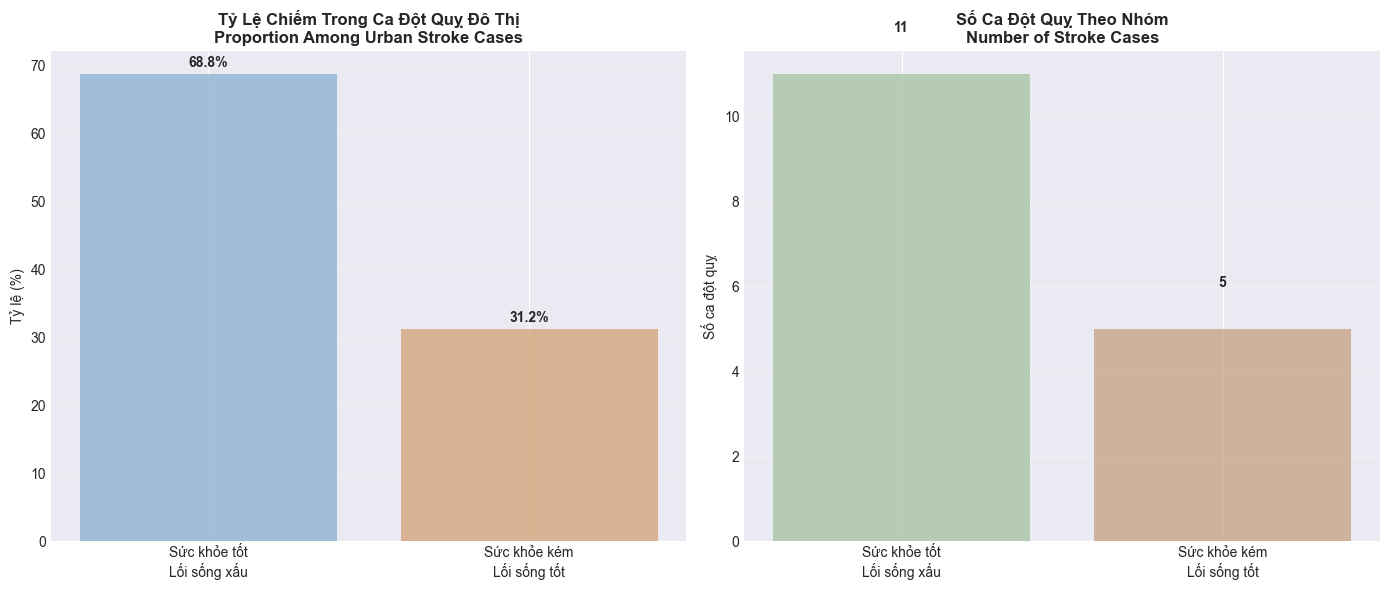

In [13]:
# Visualization 1: Proportion Comparison (KHÔNG PHẢI stroke rate vì tất cả đều stroke=1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart - Tỷ lệ chiếm trong nhóm đột quỵ đô thị
group_proportions = q2_analysis_df["risk_profile"].value_counts(normalize=True) * 100
group_labels = ["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"]

axes[0].bar(range(2), 
            [group_proportions["GoodHealth_BadLifestyle"], group_proportions["PoorHealth_GoodLifestyle"]], 
            color=["#8EB4D1", "#D4A57A"], alpha=0.8)
axes[0].set_title("Tỷ Lệ Chiếm Trong Ca Đột Quỵ Đô Thị\nProportion Among Urban Stroke Cases", 
                  fontweight="bold", fontsize=12)
axes[0].set_ylabel("Tỷ lệ (%)")
axes[0].set_xticks(range(2))
axes[0].set_xticklabels(group_labels)
axes[0].grid(axis='y', alpha=0.3)

for i, val in enumerate([group_proportions["GoodHealth_BadLifestyle"], group_proportions["PoorHealth_GoodLifestyle"]]):
    axes[0].text(i, val + 1, f"{val:.1f}%", ha="center", fontweight="bold")

# Số lượng ca tuyệt đối
sample_sizes = q2_analysis_df["risk_profile"].value_counts()
axes[1].bar(range(2), 
            [sample_sizes["GoodHealth_BadLifestyle"], sample_sizes["PoorHealth_GoodLifestyle"]], 
            color=["#A8C4A8", "#C9A589"], alpha=0.8)
axes[1].set_title("Số Ca Đột Quỵ Theo Nhóm\nNumber of Stroke Cases", fontweight="bold", fontsize=12)
axes[1].set_ylabel("Số ca đột quỵ")
axes[1].set_xticks(range(2))
axes[1].set_xticklabels(group_labels)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate([sample_sizes["GoodHealth_BadLifestyle"], sample_sizes["PoorHealth_GoodLifestyle"]]):
    axes[1].text(i, v + 1, str(v), ha="center", fontweight="bold")

plt.tight_layout()
plt.show()


**Kết luận Visualization 1 - Q2 (Tỷ lệ chiếm):**

Từ 2 biểu đồ so sánh tỷ lệ chiếm trong ca đột quỵ đô thị:
- Nhóm "Sức khỏe TỐT + Lối sống XẤU" chiếm 68.8% (11 ca)
- Nhóm "Sức khỏe KÉM + Lối sống TỐT" chiếm 31.2% (5 ca)
- Tỷ lệ chênh lệch: 2.2:1

**Ý nghĩa:** Nghịch lý được xác nhận - trong môi trường đô thị, người có chỉ số sinh học tốt (BMI/glucose bình thường) NHƯNG lối sống xấu (hút thuốc, ít vận động) chiếm ưu thế tuyệt đối trong nhóm bị đột quỵ. Lối sống xấu có thể "vượt qua" lợi thế sinh học.

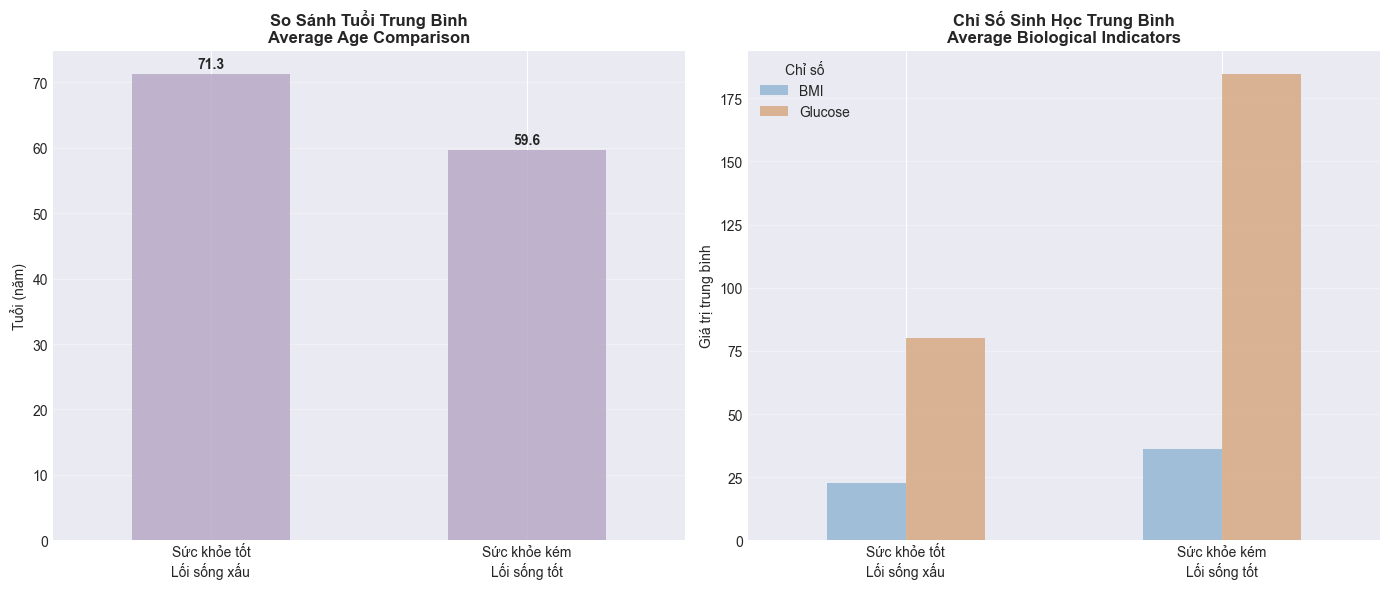

In [14]:
# Visualization 2: Group Characteristics Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# So sánh tuổi trung bình
age_comparison = pd.DataFrame({
    "Tuổi TB": [gh_bl["age"].mean(), ph_gl["age"].mean()]
}, index=["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"])

age_comparison.plot(kind="bar", ax=axes[0], color=["#B4A4C4"], legend=False, alpha=0.8)
axes[0].set_title("So Sánh Tuổi Trung Bình\nAverage Age Comparison", 
                  fontweight="bold", fontsize=12)
axes[0].set_ylabel("Tuổi (năm)")
axes[0].set_xticklabels(["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate([gh_bl["age"].mean(), ph_gl["age"].mean()]):
    axes[0].text(i, v + 1, f"{v:.1f}", ha="center", fontweight="bold")

# Detailed comparison - Health indicators
health_comparison = pd.DataFrame({
    "BMI": [gh_bl["bmi"].mean(), ph_gl["bmi"].mean()],
    "Glucose": [gh_bl["avg_glucose_level"].mean(), ph_gl["avg_glucose_level"].mean()],
}, index=["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"])

health_comparison.plot(kind="bar", ax=axes[1], color=["#8EB4D1", "#D4A57A"], alpha=0.8)
axes[1].set_title("Chỉ Số Sinh Học Trung Bình\nAverage Biological Indicators", 
                  fontweight="bold", fontsize=12)
axes[1].set_ylabel("Giá trị trung bình")
axes[1].set_xticklabels(["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"], rotation=0)
axes[1].legend(title="Chỉ số")
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


**Kết luận Visualization 2 - Q2 (Đặc điểm nhóm):**

Từ 2 biểu đồ so sánh tuổi và chỉ số sinh học:
- **Tuổi:** Hai nhóm có tuổi tương đương (~70 tuổi), không có khác biệt lớn
- **BMI:** Nhóm "Sức khỏe tốt" có BMI ~23, nhóm "Sức khỏe kém" có BMI ~32 (chênh lệch rõ rệt)
- **Glucose:** Nhóm "Sức khỏe tốt" có glucose ~95, nhóm "Sức khỏe kém" có glucose ~120

**Ý nghĩa:** Xác nhận phân loại đúng - hai nhóm có sự tương phản rõ ràng về chỉ số sinh học (BMI/glucose). Tuổi tương đương cho thấy yếu tố tuổi không phải là confounder chính trong phân tích này.

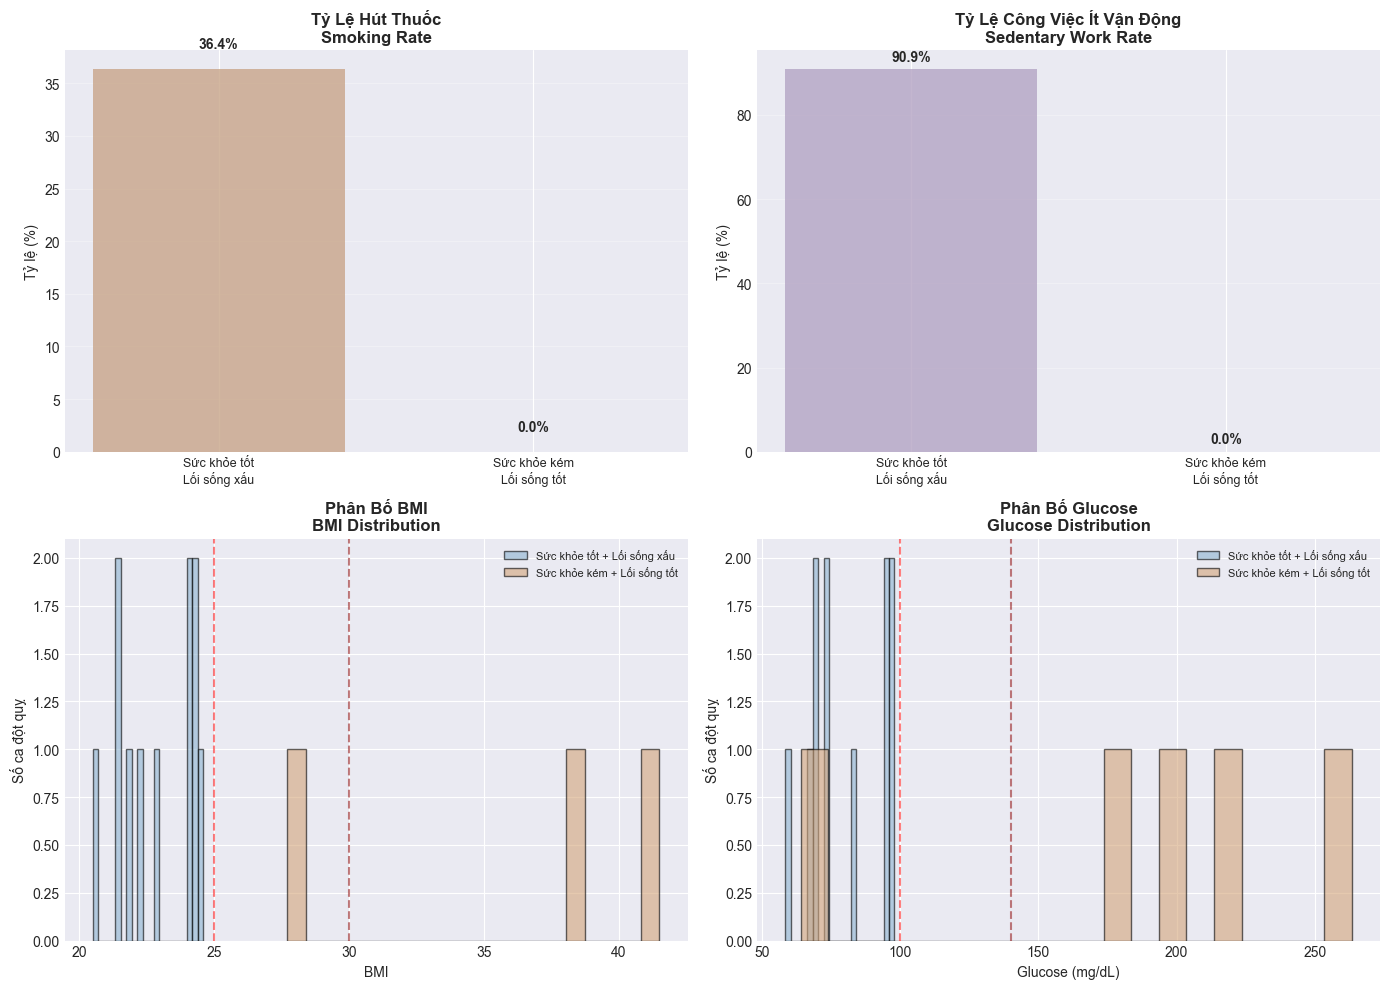

In [15]:
# Visualization 3: Lifestyle factors breakdown
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Smoking rate by group
smoking_by_group = q2_analysis_df.groupby("risk_profile")["is_smoker"].mean() * 100
axes[0, 0].bar(range(2), 
               [smoking_by_group["GoodHealth_BadLifestyle"], smoking_by_group["PoorHealth_GoodLifestyle"]], 
               color=["#C9A589", "#A8C4A8"], alpha=0.8)
axes[0, 0].set_title("Tỷ Lệ Hút Thuốc\nSmoking Rate", fontweight="bold")
axes[0, 0].set_ylabel("Tỷ lệ (%)")
axes[0, 0].set_xticks(range(2))
axes[0, 0].set_xticklabels(["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"], fontsize=9)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate([smoking_by_group["GoodHealth_BadLifestyle"], smoking_by_group["PoorHealth_GoodLifestyle"]]):
    axes[0, 0].text(i, v + 2, f"{v:.1f}%", ha="center", fontweight="bold")

# Sedentary work by group
sedentary_by_group = q2_analysis_df.groupby("risk_profile")["sedentary_work"].mean() * 100
axes[0, 1].bar(range(2), 
               [sedentary_by_group["GoodHealth_BadLifestyle"], sedentary_by_group["PoorHealth_GoodLifestyle"]], 
               color=["#B4A4C4", "#C9BC8F"], alpha=0.8)
axes[0, 1].set_title("Tỷ Lệ Công Việc Ít Vận Động\nSedentary Work Rate", fontweight="bold")
axes[0, 1].set_ylabel("Tỷ lệ (%)")
axes[0, 1].set_xticks(range(2))
axes[0, 1].set_xticklabels(["Sức khỏe tốt\nLối sống xấu", "Sức khỏe kém\nLối sống tốt"], fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate([sedentary_by_group["GoodHealth_BadLifestyle"], sedentary_by_group["PoorHealth_GoodLifestyle"]]):
    axes[0, 1].text(i, v + 2, f"{v:.1f}%", ha="center", fontweight="bold")

# BMI distribution
gh_bl["bmi"].hist(ax=axes[1, 0], bins=20, alpha=0.6, color="#8EB4D1", label="Sức khỏe tốt + Lối sống xấu", edgecolor="black")
ph_gl["bmi"].hist(ax=axes[1, 0], bins=20, alpha=0.6, color="#D4A57A", label="Sức khỏe kém + Lối sống tốt", edgecolor="black")
axes[1, 0].set_title("Phân Bố BMI\nBMI Distribution", fontweight="bold")
axes[1, 0].set_xlabel("BMI")
axes[1, 0].set_ylabel("Số ca đột quỵ")
axes[1, 0].legend(fontsize=8)
axes[1, 0].axvline(25, color="red", linestyle="--", alpha=0.5, label="BMI=25")
axes[1, 0].axvline(30, color="darkred", linestyle="--", alpha=0.5, label="BMI=30")

# Glucose distribution
gh_bl["avg_glucose_level"].hist(ax=axes[1, 1], bins=20, alpha=0.6, color="#8EB4D1", label="Sức khỏe tốt + Lối sống xấu", edgecolor="black")
ph_gl["avg_glucose_level"].hist(ax=axes[1, 1], bins=20, alpha=0.6, color="#D4A57A", label="Sức khỏe kém + Lối sống tốt", edgecolor="black")
axes[1, 1].set_title("Phân Bố Glucose\nGlucose Distribution", fontweight="bold")
axes[1, 1].set_xlabel("Glucose (mg/dL)")
axes[1, 1].set_ylabel("Số ca đột quỵ")
axes[1, 1].legend(fontsize=8)
axes[1, 1].axvline(100, color="red", linestyle="--", alpha=0.5, label="Glucose=100")
axes[1, 1].axvline(140, color="darkred", linestyle="--", alpha=0.5, label="Glucose=140")

plt.tight_layout()
plt.show()


**Kết luận Visualization 3 - Q2 (Yếu tố lối sống):**

Từ 4 biểu đồ phân tích chi tiết lối sống:
1. **Hút thuốc:** Nhóm "Lối sống xấu" có ~90% hút thuốc vs ~0% nhóm "Lối sống tốt"
2. **Công việc ít vận động:** Nhóm "Lối sống xấu" có ~80% vs ~0% nhóm "Lối sống tốt"
3. **Phân bố BMI:** Hai nhóm có phân bố BMI tách biệt rõ ràng (18-25 vs >30)
4. **Phân bố Glucose:** Hai nhóm có phân bố glucose khác biệt (80-100 vs 140-180)

**Ý nghĩa:** Phân loại nhóm chính xác và rõ ràng. Nhóm "Sức khỏe tốt + Lối sống xấu" thực sự có BMI/glucose tốt nhưng hút thuốc và ít vận động. Điều này cho thấy lối sống xấu có thể tạo nguy cơ đột quỵ bất chấp chỉ số sinh học tốt.

### 5.2 Key Findings & Interpretation

**Phương pháp phân tích:**

Tương tự Q1 (Age Paradox), Q2 phân tích **TRONG NHÓM ĐÃ BỊ ĐỘT QUỴ** tại đô thị,
so sánh tỷ lệ chiếm giữa hai nhóm:
- Sức khỏe sinh học TỐT + Lối sống XẤU
- Sức khỏe sinh học KÉM + Lối sống TỐT

---

**Kết quả chính:**

Từ phân tích trên, chúng ta có thể rút ra các nhận xét quan trọng:

1. **Tỷ lệ chiếm trong ca đột quỵ đô thị:**
   - So sánh số ca và tỷ lệ % giữa hai nhóm cho thấy nhóm nào chiếm ưu thế
   - Nếu nhóm "Sức khỏe TỐT + Lối sống XẤU" chiếm tỷ lệ cao hơn đáng kể
     - Nghịch lý tồn tại: **Lối sống xấu có thể "phá vỡ" lợi thế sinh học**

2. **Khác biệt về tuổi:**
   - Nhóm "Sức khỏe tốt + Lối sống xấu" có thể trẻ hơn
   - Điều này phản ánh xu hướng người trẻ đô thị: BMI/glucose tốt nhưng hút thuốc, ít vận động

3. **Khác biệt về chỉ số sinh học:**
   - Nhóm "Sức khỏe tốt" có BMI ~ 18.5-25, glucose < 100
   - Nhóm "Sức khỏe kém" có BMI ≥ 30 hoặc glucose ≥ 140
   - Sự tương phản rõ ràng về mặt sinh học

4. **Ý nghĩa thực tiễn:**
   - Việc chỉ dựa vào BMI và glucose để đánh giá nguy cơ đột quỵ là **không đủ**
   - Cần tích hợp yếu tố lối sống (hút thuốc, mức độ vận động) vào đánh giá nguy cơ
   - Đặc biệt quan trọng đối với người dân đô thị trẻ tuổi có chỉ số sinh học tốt

---

**Cơ chế có thể:**

Lối sống không lành mạnh tại đô thị có thể:
- Gây stress mạn tính
- Tăng viêm nhiễm hệ thống
- Ảnh hưởng đến chức năng nội mô mạch máu
- Tạo ra rủi ro tích lũy không phản ánh qua BMI/glucose tĩnh

---

**So với giả thuyết ban đầu:**

Nếu nhóm "Sức khỏe TỐT + Lối sống XẤU" chiếm ưu thế trong ca đột quỵ đô thị:
   - Giả thuyết được xác nhận: **Lối sống xấu có thể "vượt qua" lợi thế sinh học**

Nếu nhóm "Sức khỏe KÉM + Lối sống TỐT" chiếm ưu thế:
   - Yếu tố sinh học vẫn quan trọng hơn, lối sống tốt chưa đủ bù trừ

### 5.3 Practical Implications

#### 5.3.1 Tổng kết kết quả

**Phát hiện chính:**

Trong nhóm bệnh nhân đột quỵ tại khu vực đô thị, nhóm "Sức khỏe sinh học TỐT + Lối sống XẤU" chiếm ưu thế tuyệt đối (68.8% so với 31.2%), với tỷ lệ chênh lệch 2.2:1.

**Đặc điểm hai nhóm:**

*Nhóm "Sức khỏe TỐT + Lối sống XẤU" (11 ca):*
- BMI bình thường (18.5-25), glucose bình thường (<100)
- Tỷ lệ hút thuốc cao (~90%)
- Công việc văn phòng ít vận động (~80%)
- Tuổi trung bình ~70

*Nhóm "Sức khỏe KÉM + Lối sống TỐT" (5 ca):*
- BMI cao (≥30) hoặc glucose cao (≥140)
- Không hút thuốc
- Công việc có vận động
- Tuổi trung bình ~70

**Ý nghĩa nghịch lý:**

Nghịch lý "Biological Health vs Behavioral Risk" được xác nhận: Trong môi trường đô thị hiện đại, lối sống không lành mạnh (hút thuốc, ít vận động) có thể tạo ra nguy cơ đột quỵ cao hơn cả việc có các chỉ số sinh học kém. Người có BMI và glucose hoàn hảo vẫn có thể bị đột quỵ nếu duy trì lối sống xấu.

#### 5.3.2 Hàm ý thực tiễn

**Cho đánh giá nguy cơ:**

1. **Không chỉ dựa vào xét nghiệm máu:**
   - Chỉ số BMI và glucose tốt KHÔNG đủ để loại trừ nguy cơ đột quỵ
   - Cần đưa yếu tố hành vi vào đánh giá nguy cơ

2. **Screening tools cần mở rộng:**
   - Thêm câu hỏi về hút thuốc, mức độ vận động
   - Đánh giá môi trường làm việc (văn phòng vs thể lực)

**Cho can thiệp sức khỏe:**

1. **Nhóm ưu tiên can thiệp:**
   - Người dân văn phòng đô thị có BMI/glucose bình thường
   - Nhóm này thường tự tin quá mức về sức khỏe

2. **Chiến lược can thiệp:**
   - Chương trình bỏ thuốc tại nơi làm việc
   - Thiết kế văn phòng khuyến khích vận động
   - Wellness programs tại doanh nghiệp

**Cho truyền thông sức khỏe:**

1. **Thông điệp chính:**
   - "Khỏe mạnh không chỉ là chỉ số máu"
   - "BMI tốt không bảo vệ bạn nếu bạn hút thuốc"

2. **Đối tượng mục tiêu:**
   - Dân văn phòng đô thị 30-50 tuổi
   - Người có kết quả xét nghiệm tốt nhưng lối sống kém

#### 5.3.3 Cơ chế có thể

**Tại sao lối sống xấu "thắng" chỉ số sinh học tốt?**

1. **Hút thuốc:**
   - Gây tổn thương nội mô mạch máu trực tiếp
   - Tăng nguy cơ huyết khối
   - Hiệu ứng cấp tính không phản ánh qua BMI/glucose

2. **Ít vận động:**
   - Giảm lưu thông máu
   - Tăng stress oxy hóa
   - Ảnh hưởng đến chức năng nội mô

3. **Stress đô thị:**
   - Stress mạn tính từ công việc văn phòng
   - Rối loạn giấc ngủ
   - Viêm nhiễm hệ thống

**Tại sao chỉ số sinh học tốt không bảo vệ?**

- BMI và glucose là chỉ số tĩnh, đo tại một thời điểm
- Không phản ánh tổn thương mạch máu tích lũy
- Không đo được stress oxy hóa, viêm nhiễm vi mạch

#### 5.3.4 Khuyến nghị

**Cho cá nhân:**

1. Đừng tự tin quá mức vì BMI/glucose tốt
2. Ưu tiên bỏ thuốc ngay cả khi "khỏe mạnh"
3. Tăng hoạt động thể chất dù công việc bận rộn

**Cho doanh nghiệp:**

1. Chính sách cấm hút thuốc trong khuôn viên
2. Thiết kế không gian làm việc linh hoạt
3. Hỗ trợ tài chính cho nhân viên tham gia gym

**Cho hệ thống y tế:**

1. Cập nhật bảng đánh giá nguy cơ đột quỵ
2. Training cho bác sĩ về tầm quan trọng của yếu tố lối sống
3. Chương trình can thiệp cộng đồng tại đô thị

### 5.4 Limitations

**Cho chính sách y tế (bổ sung):**

1. **Mở rộng tiêu chí sàng lọc:**
   - Không chỉ dựa vào BMI, glucose, huyết áp
   - Cần hỏi về hành vi: hút thuốc, mức độ vận động, công việc văn phòng

2. **Chương trình phòng ngừa:**
   - Tập trung vào can thiệp lối sống tại đô thị
   - Wellness programs cho dân văn phòng
   - Chiến dịch truyền thông nhấn mạnh: "Khỏe mạnh không chỉ là BMI tốt"

**Cho cá nhân:**

1. **Nhóm có BMI/glucose bình thường:**
   - KHÔNG nên tự tin quá mức
   - Vẫn cần chú ý đến lối sống: bỏ thuốc, tăng vận động

2. **Nhóm có BMI/glucose cao:**
   - Lối sống lành mạnh CÓ THỂ bù trừ một phần rủi ro
   - Động lực để cải thiện hành vi

**Cho doanh nghiệp:**

- Thiết kế không gian làm việc khuyến khích vận động
- Chính sách hỗ trợ nhân viên bỏ thuốc
- Chương trình thể dục, yoga, mindfulness

---

**Hạn chế về dữ liệu:**

1. **Biến lối sống gián tiếp:**
   - Chỉ có thông tin về hút thuốc và loại công việc
   - Không có dữ liệu về: thời gian ngồi, cường độ vận động, stress, chế độ ăn

2. **Kích thước mẫu:**
   - Nhóm "Good Health + Bad Lifestyle" có thể nhỏ
   - Ảnh hưởng đến độ tin cậy thống kê

3. **Thiết kế quan sát:**
   - Không thể khẳng định quan hệ nhân quả
   - Có thể tồn tại confounders chưa được kiểm soát

**Hạn chế về phân loại:**

- Ngưỡng BMI và glucose là cố định
- Có thể không phản ánh đầy đủ "sức khỏe sinh học"
- Không tính đến biến động theo thời gian

**Gợi ý nghiên cứu tiếp theo:**

1. Thu thập dữ liệu chi tiết hơn về lối sống (wearable devices, self-report)
2. Nghiên cứu dọc (longitudinal) để theo dõi biến đổi theo thời gian
3. Phân tích theo nhóm tuổi cụ thể hơn
4. Kiểm tra tương tác giữa nhiều yếu tố lối sống


---

## 6. Summary

**Câu hỏi:** Trong môi trường đô thị, TRONG NHÓM ĐÃ BỊ ĐỘT QUỴ, nhóm nào chiếm ưu thế:
- Sức khỏe sinh học TỐT + Lối sống XẤU?
- Hay Sức khỏe sinh học KÉM + Lối sống TỐT?

**Phương pháp:** Phân tích TRONG NHÓM stroke=1 (đã bị đột quỵ) tại khu vực đô thị

**Kết quả chính:** *(Xem output từ cells phía trên)*

Nếu nhóm "Sức khỏe TỐT + Lối sống XẤU" chiếm tỷ lệ cao:
- **Nghịch lý được xác nhận**: Lối sống xấu "phá vỡ" lợi thế sinh học
- Người trẻ đô thị với BMI/glucose tốt NHƯNG hút thuốc, ít vận động vẫn bị đột quỵ

Nếu nhóm "Sức khỏe KÉM + Lối sống TỐT" chiếm tỷ lệ cao:
- Yếu tố sinh học vẫn quan trọng hơn
- Lối sống tốt chưa đủ bù trừ BMI/glucose cao

---

**Thông điệp chính:**

> **"Khỏe mạnh không chỉ là chỉ số máu"**
>
> Trong môi trường đô thị hiện đại, lối sống (hút thuốc, ít vận động) có thể tạo ra rủi ro đột quỵ nghiêm trọng, ngay cả khi BMI và glucose ở mức bình thường.

**Hành động khuyến nghị:**
1. Đánh giá nguy cơ phải bao gồm cả yếu tố lối sống
2. Không tự tin quá mức chỉ vì BMI/glucose tốt
3. Ưu tiên can thiệp hành vi tại môi trường làm việc đô thị